In [1]:
import os
import sys
sys.path.append(os.environ.get("FASTAI_PATH"))

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
data_path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
data = (
    ImageList.from_folder(data_path) # images path
    .split_by_folder() # split train and valid datasets by folder
    .label_from_folder()  # get labels from folder name
    .transform(size=28) # resize each image to 28x28
    .databunch(bs=256) # batch size 256
    .normalize(imagenet_stats) # normalize images with mean and std from IMageNet
)

### Self-defined Model

In [16]:
class Flatten(nn.Module):
    def __init__(self): super().__init__()
    def forward(self, x): return x.view(x.size(0), -1)

In [17]:
model = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(6, 16, 5),
    nn.MaxPool2d(2,2),
    
    Flatten(),
    nn.Linear(16*4*4, 120),
    nn.ReLU(),
    
    nn.Linear(120, 2)
)

In [25]:
learn = Learner(data, model, metrics=[error_rate])

In [26]:
learn = learn.split((model[3], ))

In [27]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
   (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
 ), Sequential(
   (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (1): Flatten()
   (2): Linear(in_features=256, out_features=120, bias=True)
   (3): ReLU()
   (4): Linear(in_features=120, out_features=2, bias=True)
 )]

In [28]:
learn.unfreeze()
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.003123,0.012728,0.005397,00:02
1,0.002777,0.010101,0.003435,00:02
2,0.004173,0.014423,0.004416,00:02
3,0.003475,0.006547,0.002453,00:02
4,0.002428,0.009851,0.002944,00:02
5,0.002127,0.048993,0.013248,00:02
6,0.005543,0.009879,0.002944,00:01
7,0.002499,0.011216,0.003435,00:02
8,0.001104,0.008695,0.002944,00:02
9,0.000506,0.008663,0.002453,00:01


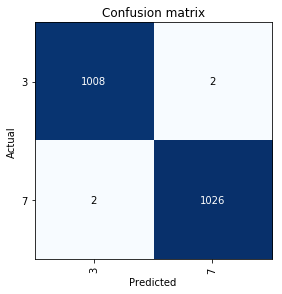

In [29]:
interp = learn.interpret()
interp.plot_confusion_matrix()